<a href="https://colab.research.google.com/github/AldoMercado/Clasificacion-inteligente-de-datos/blob/main/Hands-on-2/Hands_on_2_Tutorial_kNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Hands-on 2:** Tutorial de kNN
* **Nombre:** Aldo Giovanni Mercado Rodriguez
* **Materia:** Clasificación Inteligente de Datos

## 1.1 Fundamentos de la técnica

El algoritmo de **k-Vecinos más Cercanos (kNN)** es un método de aprendizaje supervisado simple pero muy potente. A diferencia del Perceptrón, kNN es un modelo "basado en instancias" o "perezoso" (lazy learner).

* **Funcionamiento:** Para clasificar un nuevo punto de datos, el algoritmo mira a los **'k' puntos** del conjunto de entrenamiento que están más cerca de él (sus "vecinos").

* **Votación:** La clase del nuevo punto se decide por una **"votación de mayoría"** entre sus 'k' vecinos. Si k=5, y 3 vecinos son "Clase A" y 2 son "Clase B", el nuevo punto será clasificado como "Clase A".

* **Sin "entrenamiento":** kNN no "aprende" un modelo (como el Perceptrón que busca una línea). Su fase de "entrenamiento" consiste simplemente en **memorizar todo el conjunto de datos**. La computación real ocurre durante la predicción.

* **Importancia de 'k':** Elegir el valor de 'k' (el número de vecinos) es crucial. Un 'k' muy pequeño hace al modelo sensible al ruido, y un 'k' muy grande puede ignorar las clases menos comunes.

* **Sensibilidad a la escala:** Dado que se basa en "distancia", kNN es muy sensible a la escala de las características. Es fundamental **estandarizar o normalizar los datos** antes de usarlos.

## 1.2 Modelo Matemático

El "modelo" matemático de kNN no es una ecuación de predicción (como $y = mx + b$), sino que se basa en dos componentes:

**1. Almacenamiento de Datos:** El modelo es el propio conjunto de entrenamiento $D = \{(\mathbf{x}_1, y_1), (\mathbf{x}_2, y_2), \dots, (\mathbf{x}_N, y_N)\}$, donde $\mathbf{x}$ es el vector de características y $y$ es la clase.

**2. Métrica de Distancia (Distancia Euclideana):** Para encontrar los "vecinos más cercanos", se debe calcular la distancia entre el nuevo punto $\mathbf{p}$ y todos los puntos $\mathbf{q}$ en el conjunto de entrenamiento. La métrica más común es la **Distancia Euclideana**:

Para dos puntos $\mathbf{p} = (p_1, p_2, \dots, p_n)$ y $\mathbf{q} = (q_1, q_2, \dots, q_n)$ en $n$ dimensiones (n características), la distancia se calcula como:

$$ d(\mathbf{p}, \mathbf{q}) = \sqrt{(p_1 - q_1)^2 + (p_2 - q_2)^2 + \dots + (p_n - q_n)^2} = \sqrt{\sum_{i=1}^{n} (p_i - q_i)^2} $$

**3. Regla de Predicción (Voto de Mayoría):** Una vez que se tienen las distancias a todos los puntos de entrenamiento, se seleccionan los 'k' puntos con las distancias más pequeñas (los $k$-vecinos). La predicción $\hat{y}$ para el nuevo punto $\mathbf{p}$ es la **moda** (la clase más frecuente) de las etiquetas de esos 'k' vecinos.

## 1.3 Descripción de la librería, clases y funciones

Para este tutorial, usaremos scikit-learnypandas para el análisis.

* **pandas**: La usaremos para cargar los datos en un "DataFrame", lo que facilita mucho el análisis estadístico (.describe()).

* **sklearn.datasets.load_iris**: Función para cargar el dataset Iris. * **sklearn.model_selection.train_test_split**: Para dividir los datos en entrenamiento y prueba.

* **sklearn.preprocessing.StandardScaler**: **Esta clase es fundamental para kNN**. Como el algoritmo se basa en distancias, si una característica (ej. "largo del pétalo") tiene valores mucho más grandes que otra (ej. "ancho del pétalo"), dominará el cálculo de la distancia. StandardScaler pone todas las características en la misma escala (media=0, desviación=1).

* **sklearn.neighbors.KNeighborsClassifier**: Esta es la clase que implementa el modelo kNN. La configuraremos con el número de vecinos (k) que queremos usar. * **sklearn.metrics.accuracy_score**: Mide la exactitud (porcentaje de aciertos) del modelo.

* **sklearn.metrics.confusion_matrix**: (Requerida en esta actividad) Nos muestra una matriz de aciertos y errores, detallando qué clases confundió el modelo.

* **matplotlib.pyplotyseaborn**: Librerías para crear nuestras gráficas (el gráfico de dispersión y la matriz de confusión).

## 1.4 Pipeline

A continuación, se presenta el pipeline completo. Empezamos importando todas las librerías necesarias.

In [ ]:
# Paso 0: Importar las librerías necesarias
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

### + Preprocesamiento (Análisis Estadístico y Gráfico)

En este paso, cargamos los datos y realizamos el análisis estadístico y la visualización que se solicitan.

--- Análisis Estadístico (avg, desv std, max, min) ---
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)     species  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  

--- Generando Gr

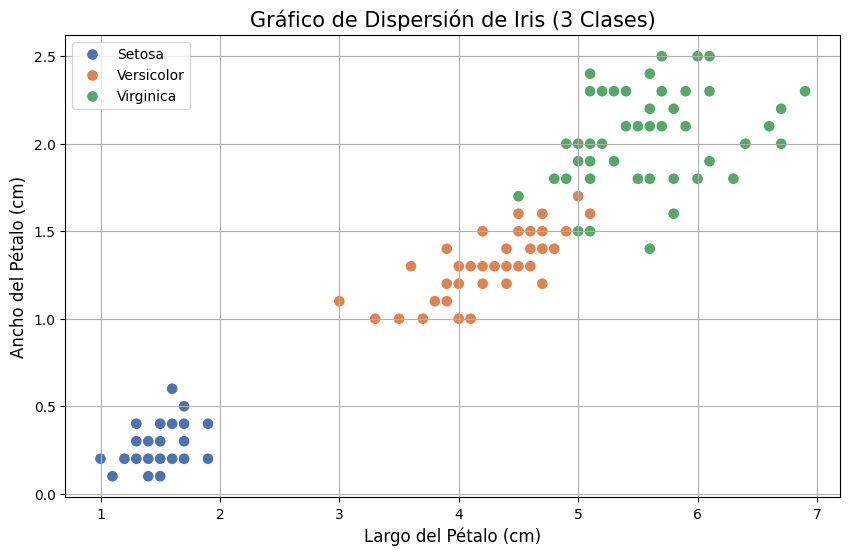

In [ ]:
# 1. Cargar el dataset
iris = load_iris()
X = iris.data
y = iris.target

# 2. Análisis Estadístico (avg, std, max, min)
# Para esto, es más fácil usar un DataFrame de Pandas
# Creamos el DataFrame con los datos (X) y nombres de columnas
df = pd.DataFrame(X, columns=iris.feature_names)
# Añadimos la especie (y) para referencia
df['species'] = y

print("--- Análisis Estadístico (avg, desv std, max, min) ---")
# .describe() nos da todas las estadísticas solicitadas
print(df.describe())

# 3. Gráfico de Dispersión (Scatter Plot)
print("\n--- Generando Gráfico de Dispersión (Scatter Plot) ---")

# Usaremos seaborn para un gráfico más claro, usando las 3 clases
# Mapeamos los números de especie (0, 1, 2) a sus nombres
species_map = {0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'}
df['species_name'] = df['species'].map(species_map)

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='petal length (cm)',  # Largo del pétalo
    y='petal width (cm)',   # Ancho del pétalo
    hue='species_name',     # Color por nombre de especie
    palette='deep',         # Paleta de colores
    s=70                    # Tamaño de los puntos
)
plt.title('Gráfico de Dispersión de Iris (3 Clases)', fontsize=15)
plt.xlabel('Largo del Pétalo (cm)', fontsize=12)
plt.ylabel('Ancho del Pétalo (cm)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

### + Feature Engineering (Ingeniería de Características)

**Descripción de las variables (Señales I/O):** * **Entrada (X):** Usaremos las 4 características del dataset: sepal length, sepal width, petal length, petal width. * **Salida (y):** La variable objetivo es la especie de la flor, con 3 clases: 0 (Setosa), 1 (Versicolor), 2 (Virginica).

**Selección de variables:** Emplearemos las 4 características, ya que kNN puede manejar múltiples dimensiones. El paso más importante de Feature Engineering aquí es el **escalado de datos**, que es obligatorio para kNN.

**Pipeline de esta sección:** 1. Dividir los datos (X, y) en train_test_split. 2. Crear un objeto StandardScaler. 3. Ajustar el escalador (.fit()) **solo** con los datos de X_train. 4. Transformar (.transform()) tanto X_traincomoX_test.

In [ ]:
# 1. Dividir los datos (70% entrenamiento, 30% prueba)
# Usamos 'stratify=y' para asegurar que la proporción de las 3 clases
# sea la misma en el conjunto de entrenamiento y en el de prueba.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"Forma de X_train: {X_train.shape}")
print(f"Forma de X_test: {X_test.shape}")

# 2. Escalar los datos (Estandarización)
print("\nEscalando datos...")
scaler = StandardScaler()

# 3. Ajustar el escalador SOLO con los datos de entrenamiento
scaler.fit(X_train)

# 4. Transformar ambos conjuntos
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Mostramos un ejemplo del antes y después
print("\nEjemplo de escalado (primera fila de X_train):")
print(f"Original:  {X_train[0]}")
print(f"Escalado: {X_train_scaled[0]}")

Forma de X_train: (105, 4)
Forma de X_test: (45, 4)

Escalando datos...

Ejemplo de escalado (primera fila de X_train):
Original:  [5.1 2.5 3.  1.1]
Escalado: [-0.90045861 -1.22024754 -0.4419858  -0.13661044]


### + Creación del Modelo (Paso previo a la Predicción)

Antes de poder predecir, necesitamos crear nuestro modelo KNeighborsClassifier. El hiperparámetro más importante es n_neighbors (el valor 'k'). Un valor común para empezar es k=5.

In [ ]:
# Elegimos un valor para 'k'
k_value = 5

# 1. Creamos una instancia del modelo kNN
knn_model = KNeighborsClassifier(n_neighbors=k_value)

# 2. "Entrenamos" el modelo (solo memoriza los datos de X_train_scaled, y_train)
knn_model.fit(X_train_scaled, y_train)

print(f"¡Modelo kNN (con k={k_value}) creado y listo!")

¡Modelo kNN (con k=5) creado y listo!


### + Prediction (Predicción)

Ahora creamos la función solicitada que recibe un patrón de entrada (las 4 características) y muestra la clase predicha.

In [ ]:
# Mapeo de números a nombres (el mismo de la gráfica)
species_map = {0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'}

# Función para probar un patrón de entrada individual
def probar_patron_knn(patron_de_entrada):
    # El patrón debe ser una lista o array de 4 números
    if len(patron_de_entrada) != 4:
        print("Error: El patrón debe tener 4 características.")
        return

    # 1. Escalar el patrón
    # ¡Importante! Usamos el MISMO 'scaler' que ajustamos con los datos de entrenamiento
    # [patron_de_entrada] lo convierte en un array 2D (1 fila, 4 cols)
    patron_scaled = scaler.transform([patron_de_entrada])

    # 2. Predecir la clase usando el modelo kNN
    prediccion_num = knn_model.predict(patron_scaled)

    # 3. Interpretar y mostrar el resultado
    clase_predicha = species_map[prediccion_num[0]] # [0] para tomar el primer (y único) elemento

    print(f"Patrón de entrada: {patron_de_entrada}")
    print(f"Patrón escalado:   {patron_scaled[0]}")
    print(f"Predicción (0, 1, 2): {prediccion_num[0]}")
    print(f"--> Resultado: El modelo clasifica el patrón como **{clase_predicha}**.")


# --- Probemos la función ---

# Ejemplo 1: Un patrón de Setosa (clase 0)
patron_setosa = [5.1, 3.5, 1.4, 0.2]
print("--- Prueba 1 (Setosa) ---")
probar_patron_knn(patron_setosa)

print("\n" + "="*30 + "\n")

# Ejemplo 2: Un patrón de Virginica (clase 2)
patron_virginica = [6.7, 3.0, 5.2, 2.3]
print("--- Prueba 2 (Virginica) ---")
probar_patron_knn(patron_virginica)

--- Prueba 1 (Setosa) ---
Patrón de entrada: [5.1, 3.5, 1.4, 0.2]
Patrón escalado:   [-0.90045861  0.97745386 -1.3431219  -1.29964531]
Predicción (0, 1, 2): 0
--> Resultado: El modelo clasifica el patrón como **Setosa**.


--- Prueba 2 (Virginica) ---
Patrón de entrada: [6.7, 3.0, 5.2, 2.3]
Patrón escalado:   [ 0.9625592  -0.12139684  0.79707634  1.41410271]
Predicción (0, 1, 2): 2
--> Resultado: El modelo clasifica el patrón como **Virginica**.


### + Model Evaluation (Evaluación del Modelo)

Finalmente, evaluamos el rendimiento de nuestro modelo en *todo* el conjunto de prueba (X_test_scaled) usando las métricas solicitadas: Accuracy y Matriz de Confusión.

--- Métrica 1: Accuracy ---
El Accuracy del modelo kNN (k=5) es: 91.11%

Breve explicación:
El Accuracy mide el porcentaje total de predicciones correctas.
De las 45 muestras de prueba, el modelo acertó en 41 de ellas.

--- Métrica 2: Matriz de Confusión ---
Breve explicación:
La Matriz de Confusión desglosa los aciertos y errores por cada clase.
La diagonal principal (de arriba-izquierda a abajo-derecha) muestra los ACIERTOS.
Cualquier número fuera de esa diagonal representa un ERROR (una confusión del modelo).


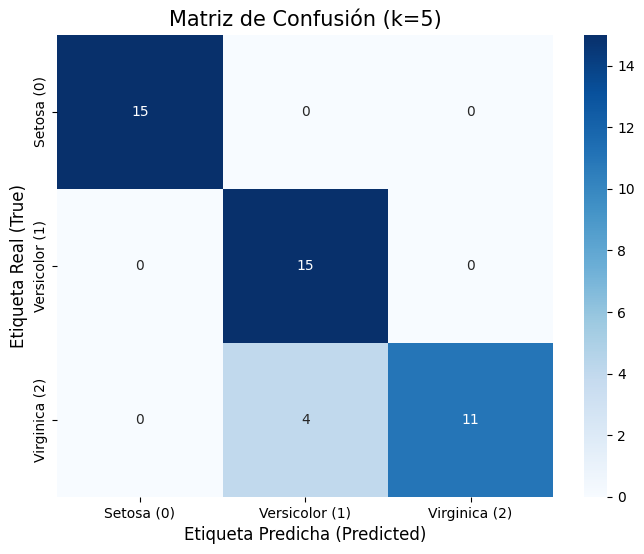

In [ ]:
# 1. Realizar predicciones para TODO el conjunto de prueba
y_pred = knn_model.predict(X_test_scaled)

# --- Métrica 1: Accuracy (Exactitud) ---
accuracy = accuracy_score(y_test, y_pred)

print(f"--- Métrica 1: Accuracy ---")
print(f"El Accuracy del modelo kNN (k={k_value}) es: {accuracy * 100:.2f}%")
print("\nBreve explicación:")
print("El Accuracy mide el porcentaje total de predicciones correctas.")
print(f"De las {len(y_test)} muestras de prueba, el modelo acertó en {int(accuracy * len(y_test))} de ellas.")


# --- Métrica 2: Matriz de Confusión ---
print(f"\n--- Métrica 2: Matriz de Confusión ---")
print("Breve explicación:")
print("La Matriz de Confusión desglosa los aciertos y errores por cada clase.")
print("La diagonal principal (de arriba-izquierda a abajo-derecha) muestra los ACIERTOS.")
print("Cualquier número fuera de esa diagonal representa un ERROR (una confusión del modelo).")

# Calcular la matriz
cm = confusion_matrix(y_test, y_pred)

# Etiquetas para la gráfica
labels_names = ['Setosa (0)', 'Versicolor (1)', 'Virginica (2)']

# Graficar la matriz con Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=labels_names,
            yticklabels=labels_names)

plt.title(f"Matriz de Confusión (k={k_value})", fontsize=15)
plt.ylabel("Etiqueta Real (True)", fontsize=12)
plt.xlabel("Etiqueta Predicha (Predicted)", fontsize=12)
plt.show()

## 2. Ejecución del Notebook

Todas las celdas de código de este notebook están diseñadas para ejecutarse en orden (desde la importación de librerías hasta la evaluación final) en Google Colab o Jupyter, sin generar errores.

## 3. Referencias Bibliográficas

* Géron, A. (2019). *Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow* (2ª ed.). O'Reilly Media.
* Documentación oficial de Scikit-Learn sobre kNN: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
* Documentación oficial de Pandas: https://pandas.pydata.org/docs/
* Documentación oficial de Seaborn: https://seaborn.pydata.org/
* Fisher, R. A. (1936). The use of multiple measurements in taxonomic problems. *Annals of Eugenics*, 7(2), 179-188. (Paper original del dataset Iris).